# Finding Supernova Neutrinos

To date we have only managed to detect the neutrinos from one supernova, which arrived at Earth on the 23rd February 1987 and is known by the snappy name SN1987A. In this project you will investigate the feasibility of idenitfying supernova neutrino events in a new type of detector a liquid argon time-projection chamber. These detectors give incredibly high-resolution 'images' of the charged-particle tracks produced when a neutrino interacts in the detector.

The data for this mini-project comes in the form of the following files:

| File | Description |
| ----------- | ----------- |
| larImages.npy | A numpy array of 10,000 100x100 pixel images |
| meta.npy | The meta information about the particles in the image |


The images show the energy deposited in the liquid argon detector in a small slice of space and time. The meta information contains the following 64 numbers  for each image. The [PDG code](https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf) is a number which identifies the particle type (e.g electron=11, electron-neutrino=12, etc.)

| Column | Description |
| ----------- | ----------- |
| 0 | Row number |
| 1 | Neutrino Energy (MeV) |
| 2 | Initial state particles (always 2) |
| 3 | Final state particles (varies) |
| 4-8 | Initial Particle 1: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ | 
| 9-13 | Initial Particle 2: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ |
| 14-18 | Final Particle 1: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ | 
| 19-23 | Final Particle 2: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ |
| $\vdots$ | Final Particle N: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ |
| 59-63 | Final Particle 10: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ |

## Machine learning tasks
1. Write a method to simulate electronic noise in the detector. The electronic noise is expected to follow a normal distribution.
2. Develop a machine learning classifier that can successfully classify 'clean' simulated neutrinos from 'empty' slices with some amount of 'electronic noise', how does your machine learning algorithm perform at differing noise levels?
3. Test your machine learning classifier on simulated neutrinos overlaid with noise, what level of additional noise starts to impact your machine learning algorithm


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

In [2]:

images=np.load('larImages.npy') #Load the l
meta=np.load('meta.npy')

print("images.shape",images.shape)
print("meta.shape",meta.shape)

images.shape (10000, 100, 100)
meta.shape (10000, 64)


In [3]:
print("Row",int(meta[0][0]),"corresponds to a neutrino of",meta[0][1], "MeV and produced",int(meta[0][3]),"final state particles")

Row 0 corresponds to a neutrino of 21.2005 MeV and produced 6 final state particles


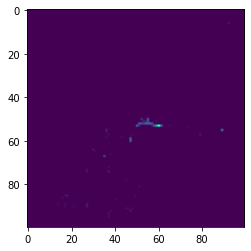

In [4]:
plt.figure()
plt.imshow(images[0])
plt.show()

# 1) Write a method to simulate electronic noise in the detector. The electronic noise is expected to follow a normal distribution.

The following cell outputs non-zero pixel values from images[0] to get an idea of what values the pixels take; this will give insight into which noise levels to choose throughout this notebook.

In [5]:
nonzero = []
for i in range(100):
    j = 0
    for val in images[0,i]:
        
        # When printing out all 10,000 pixels, most take value zero, thus include:
        
        if val > 0:
            print((i,j), val)
            nonzero.append(val)
        j +=1
    
print('The mean of the pixel values is:', np.mean(nonzero))

(6, 92) 2.0
(50, 52) 4.0
(50, 53) 1.0
(50, 55) 9.0
(51, 53) 3.0
(51, 54) 2.0
(51, 55) 8.0
(51, 59) 1.0
(52, 51) 9.0
(52, 52) 8.0
(52, 53) 6.0
(52, 54) 10.0
(52, 55) 10.0
(52, 56) 10.0
(52, 57) 7.0
(53, 50) 10.0
(53, 51) 3.0
(53, 57) 3.0
(53, 58) 10.0
(53, 59) 18.0
(53, 60) 30.0
(53, 61) 12.0
(53, 62) 1.0
(53, 65) 1.0
(54, 73) 1.0
(55, 36) 3.0
(55, 89) 12.0
(56, 36) 1.0
(57, 37) 1.0
(57, 48) 1.0
(57, 79) 2.0
(58, 36) 1.0
(58, 43) 1.0
(58, 47) 1.0
(59, 47) 10.0
(60, 47) 9.0
(64, 30) 2.0
(65, 31) 1.0
(66, 38) 1.0
(67, 35) 6.0
(72, 37) 1.0
(73, 27) 1.0
(74, 27) 2.0
(74, 37) 2.0
(78, 45) 1.0
(81, 51) 1.0
(85, 17) 1.0
(85, 18) 2.0
(85, 49) 1.0
(86, 16) 1.0
(87, 40) 1.0
(89, 14) 1.0
(89, 17) 1.0
(89, 27) 2.0
(90, 17) 1.0
(90, 21) 1.0
(90, 27) 2.0
(91, 45) 1.0
(91, 46) 1.0
(91, 48) 1.0
(92, 38) 1.0
(92, 47) 2.0
(93, 37) 1.0
(94, 37) 1.0
(95, 37) 1.0
The mean of the pixel values is: 4.030769230769231


In [6]:
nonzero = []  
for i in range(100):
    j = 0
    for val in images[0,i]:
        
        # When printing out all 10,000 pixels, most take value zero, thus include:
        
        if val > 2:
            print((i,j), val)
            nonzero.append(val)
        j +=1
        
print('The mean of the pixel values is:', np.mean(nonzero))

(50, 52) 4.0
(50, 55) 9.0
(51, 53) 3.0
(51, 55) 8.0
(52, 51) 9.0
(52, 52) 8.0
(52, 53) 6.0
(52, 54) 10.0
(52, 55) 10.0
(52, 56) 10.0
(52, 57) 7.0
(53, 50) 10.0
(53, 51) 3.0
(53, 57) 3.0
(53, 58) 10.0
(53, 59) 18.0
(53, 60) 30.0
(53, 61) 12.0
(55, 36) 3.0
(55, 89) 12.0
(59, 47) 10.0
(60, 47) 9.0
(67, 35) 6.0
The mean of the pixel values is: 9.130434782608695


### Method by which electronic noise in the liquid-argon detector is simulated:

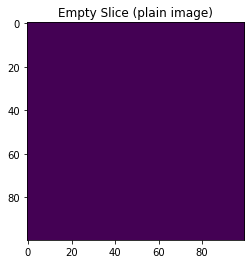

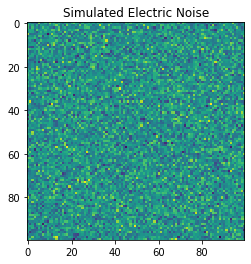

In [7]:
def add_noise(images, y_noise):
    
    '''Adds some amount of "electronic noise"
    that follows a normal distribution to a
    given image'''
    
    images_noise = images + np.random.normal(loc=y_noise, scale=1.0, size=images.shape)
    
    return images_noise

blanks = np.zeros_like(images)

y_noise = np.random.normal(0,1,blanks.shape)

Enoise = add_noise(blanks,y_noise)

plt.figure()
plt.title('Empty Slice (plain image)')
plt.imshow(blanks[0])
plt.figure()
plt.title('Simulated Electric Noise')
plt.imshow(Enoise[0],interpolation='nearest')

plt.show()

# 2) Develop a machine learning classifier that can successfully classify 'clean' simulated neutrinos from 'empty' slices with some amount of 'electronic noise', how does your machine learning algorithm perform at differing noise levels?

The following cell defines the model (neural network) used to classify the images throughout this notebook. A 2-dimensional convolutional layer was attempted for use for the sake of learning flexibility and minimising unnecessary neuron links by introducing a kernel, a computing issue that meant the epoch speed wasn't responding to a change in learning rate prevented this thus a 20 neuron fully connected dense layer was used. The classifier only has to distinguish whether the image contains a neutrino or not; it is thus binary and only requires two potential outputs which is reflected in the neuron count of the network’s ultimate dense layer.

In [8]:
model = keras.Sequential([
    #keras.layers.Conv2D(4, (5, 5), activation='relu', input_shape=(100,100,1)),
    keras.layers.Flatten(input_shape=(100,100,1)),
    keras.layers.Dense(20),
    keras.layers.Dense(2)
])

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                200020    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 42        
Total params: 200,062
Trainable params: 200,062
Non-trainable params: 0
_________________________________________________________________


Here, the model is trained on all 10,000 'clean' simulated neutrino images and all 10,000 'empty' slices with some level of 'electronic noise'. The testing images are simply a shuffling of said training images so that the machine isn't capable of identifying just through chronology.

# Training the network on shuffled copies:

In [9]:
# The classifier only has to distinguish whether the image contains a neutrino
# or not, the classifier is thus binary and only requires to 1 of 2 potential
# outputs

# Defining a function that can shuffle two inputs i.e. images / labels

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

images_labels = np.ones(10000)
Enoise_labels = np.zeros(10000)

# Noise = 5

Enoise1 = add_noise(blanks, 5)

# Noise = 10

Enoise2 = add_noise(blanks, 10)

# Noise = 15

Enoise3 = add_noise(blanks, 15)

train_images1 = np.concatenate((images, Enoise1), axis=0)
train_images2 = np.concatenate((images, Enoise2), axis=0)
train_images3 = np.concatenate((images, Enoise3), axis=0)

train_labels = np.concatenate((images_labels, Enoise_labels), axis=0)

train_images1, train_labels1 = unison_shuffled_copies(train_images1, train_labels)
train_images2, train_labels2 = unison_shuffled_copies(train_images2, train_labels)
train_images3, train_labels3 = unison_shuffled_copies(train_images3, train_labels)

test_images1, test_labels1 = unison_shuffled_copies(train_images1, train_labels1)
test_images2, test_labels2 = unison_shuffled_copies(train_images2, train_labels2)
test_images3, test_labels3 = unison_shuffled_copies(train_images3, train_labels3)

# Reshape to 4 dimensions for keras

train_images1 = train_images1.reshape(20000, 100, 100, 1)
train_images2 = train_images2.reshape(20000, 100, 100, 1)
train_images3 = train_images3.reshape(20000, 100, 100, 1)

Training Noise = 5

In [10]:
history=model.fit(train_images1, train_labels1,batch_size=100, epochs=5)

Epoch 1/5
200/200 [==============================] - 2s 5ms/step - loss: 0.2520 - accuracy: 0.9318
Epoch 2/5
200/200 [==============================] - 1s 5ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 3/5
200/200 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 4/5
200/200 [==============================] - 1s 4ms/step - loss: 4.4207e-04 - accuracy: 1.0000
Epoch 5/5
200/200 [==============================] - 1s 5ms/step - loss: 2.8534e-04 - accuracy: 1.0000


In [11]:
test_loss, test_acc = model.evaluate(test_images1, test_labels1)

625/625 [==============================] - 1s 1ms/step - loss: 2.3057e-04 - accuracy: 1.0000


Training Noise = 10

In [12]:
history=model.fit(train_images2, train_labels2,batch_size=100, epochs=5)

Epoch 1/5
200/200 [==============================] - 1s 4ms/step - loss: 2.0780e-04 - accuracy: 1.0000
Epoch 2/5
200/200 [==============================] - 1s 4ms/step - loss: 1.6028e-04 - accuracy: 1.0000
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 1.2824e-04 - accuracy: 1.0000
Epoch 4/5
200/200 [==============================] - 1s 4ms/step - loss: 1.0525e-04 - accuracy: 1.0000
Epoch 5/5
200/200 [==============================] - 1s 3ms/step - loss: 8.8091e-05 - accuracy: 1.0000


In [13]:
test_loss, test_acc = model.evaluate(test_images2, test_labels2)

625/625 [==============================] - 1s 1ms/step - loss: 7.9562e-05 - accuracy: 1.0000


Training Noise = 15

In [14]:
history=model.fit(train_images3, train_labels3,batch_size=100, epochs=5)

Epoch 1/5
200/200 [==============================] - 3s 12ms/step - loss: 7.4733e-05 - accuracy: 1.0000
Epoch 2/5
200/200 [==============================] - 1s 4ms/step - loss: 6.4191e-05 - accuracy: 1.0000
Epoch 3/5
200/200 [==============================] - 1s 4ms/step - loss: 5.5624e-05 - accuracy: 1.0000
Epoch 4/5
200/200 [==============================] - 1s 3ms/step - loss: 4.8601e-05 - accuracy: 1.0000
Epoch 5/5
200/200 [==============================] - 1s 3ms/step - loss: 4.2692e-05 - accuracy: 1.0000


In [15]:
test_loss, test_acc = model.evaluate(test_images3, test_labels3)

625/625 [==============================] - 1s 1ms/step - loss: 3.9626e-05 - accuracy: 1.0000


# Training the network on 2 equally split image arrays with zero image identicality between them:

Here, the 10,000 neutrino image simulations are split into 2 with each being used as the training set and testing set respectively alongside an equal number of noisy blanks.

In [16]:
# The first 5000 neutrino images

images1 = np.resize(images, (5000, 100, 100))

blanks = np.zeros_like(images1)

print(np.shape(images1))

# The latter 5000 neutrino images

images2 = np.flip(np.resize(np.flip(images), (5000, 100, 100)))

# The labels for both splits are identical thus no need to redefine

images1_labels = np.ones(5000)
Enoise1_labels = np.zeros(5000)

# Noise = 5

Enoise4 = add_noise(blanks,5)
Enoise5 = add_noise(blanks,5)

# Noise = 10

Enoise6 = add_noise(blanks,10)
Enoise7 = add_noise(blanks,10)

# Noise = 15

Enoise8 = add_noise(blanks,15)
Enoise9 = add_noise(blanks,15)
train_images4 = np.concatenate((images1, Enoise4), axis=0)
train_images5 = np.concatenate((images1, Enoise6), axis=0)
train_images6 = np.concatenate((images1, Enoise8), axis=0)

train_labels4 = np.concatenate((images1_labels, Enoise1_labels), axis=0)

test_images4 = np.concatenate((images2, Enoise5))
test_images5 = np.concatenate((images2, Enoise7))
test_images6 = np.concatenate((images2, Enoise9))

test_labels4 = np.concatenate((images1_labels, Enoise1_labels), axis=0)

(5000, 100, 100)


In [17]:
history=model.fit(train_images4, train_labels4,batch_size=100, epochs=5)

Epoch 1/5
100/100 [==============================] - 1s 5ms/step - loss: 4.0362e-05 - accuracy: 1.0000
Epoch 2/5
100/100 [==============================] - 0s 4ms/step - loss: 3.7471e-05 - accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 0s 4ms/step - loss: 3.4889e-05 - accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 0s 4ms/step - loss: 3.2553e-05 - accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 0s 4ms/step - loss: 3.0426e-05 - accuracy: 1.0000


In [18]:
test_loss, test_acc = model.evaluate(test_images4,  test_labels4, verbose=2)

313/313 - 1s - loss: 2.9687e-05 - accuracy: 1.0000


In [19]:
history=model.fit(train_images5, train_labels4,batch_size=100, epochs=5)

Epoch 1/5
100/100 [==============================] - 0s 4ms/step - loss: 2.8502e-05 - accuracy: 1.0000
Epoch 2/5
100/100 [==============================] - 0s 4ms/step - loss: 2.6728e-05 - accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 0s 4ms/step - loss: 2.5103e-05 - accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 0s 4ms/step - loss: 2.3611e-05 - accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 0s 4ms/step - loss: 2.2234e-05 - accuracy: 1.0000


In [20]:
test_loss, test_acc = model.evaluate(test_images5,  test_labels4, verbose=2)

313/313 - 0s - loss: 2.3857e-05 - accuracy: 1.0000


In [21]:
history=model.fit(train_images6, train_labels4,batch_size=100, epochs=5)

Epoch 1/5
100/100 [==============================] - 0s 4ms/step - loss: 2.0962e-05 - accuracy: 1.0000
Epoch 2/5
100/100 [==============================] - 0s 4ms/step - loss: 1.9773e-05 - accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 0s 4ms/step - loss: 1.8671e-05 - accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 0s 4ms/step - loss: 1.7651e-05 - accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 0s 4ms/step - loss: 1.6693e-05 - accuracy: 1.0000


In [22]:
test_loss, test_acc = model.evaluate(test_images6,  test_labels4, verbose=2)

313/313 - 0s - loss: 1.9478e-05 - accuracy: 1.0000


In [23]:
#plt.plot(values, test_acc)
#plt.plot('Noise level')

# Training the network on a singular 'clean' simulated neutrino image and a singular 'electronic noise' 'empty' slice image:

In [24]:
# Setting out the testing images and labels (9999 x 2)

images3 = np.flip(np.resize(np.flip(images), (9999, 100, 100)))
blanks3 = np.zeros_like(images3)

images3_labels = np.ones(9999)
Enoise3_labels = np.zeros(9999)

# Setting out the training images and labels (1 x 2)

images4 = np.resize(images, (1, 100, 100))
blanks4 = np.zeros_like(images4)

images4_labels = np.ones(1)
Enoise4_labels = np.zeros(1)

# Noise = 0

Enoise10 = add_noise(blanks3,0)
Enoise11 = add_noise(blanks4,0)

# Noise = 5

Enoise12 = add_noise(blanks3,5)
Enoise13 = add_noise(blanks4,5)

# Noise = 10

Enoise14 = add_noise(blanks3,10)
Enoise15 = add_noise(blanks4,10)

# Noise = 15

Enoise16 = add_noise(blanks3,15)
Enoise17 = add_noise(blanks4,15)

train_images7 = np.concatenate((images4, Enoise11), axis=0)
train_images8 = np.concatenate((images4, Enoise13), axis=0)
train_images9 = np.concatenate((images4, Enoise15), axis=0)
train_images10 = np.concatenate((images4, Enoise17), axis=0)

train_labels5 = np.concatenate((images4_labels, Enoise4_labels), axis=0)



test_images7 = np.concatenate((images3, Enoise10))
test_images8 = np.concatenate((images3, Enoise12))
test_images9 = np.concatenate((images3, Enoise14))
test_images10 = np.concatenate((images3, Enoise16))

test_labels5 = np.concatenate((images3_labels, Enoise3_labels), axis=0)

Training Noise = 0:

In [25]:
history=model.fit(train_images7, train_labels5,batch_size=100, epochs=1)

1/1 [==============================] - 2s 2s/step - loss: 0.0011 - accuracy: 1.0000


In [26]:
test_loss, test_acc = model.evaluate(test_images7,  test_labels5, verbose=2)

625/625 - 1s - loss: 1.1712 - accuracy: 0.7221


Training Noise = 5:

In [27]:
history=model.fit(train_images8, train_labels5,batch_size=100, epochs=1)

1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [28]:
test_loss, test_acc = model.evaluate(test_images8,  test_labels5, verbose=2)

625/625 - 1s - loss: 1.7776e-05 - accuracy: 1.0000


Training Noise = 10:

In [29]:
history=model.fit(train_images9, train_labels5,batch_size=100, epochs=1)

1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [30]:
test_loss, test_acc = model.evaluate(test_images9,  test_labels5, verbose=2)

625/625 - 2s - loss: 1.7766e-05 - accuracy: 1.0000


Training Noise = 15:

In [31]:
history=model.fit(train_images10, train_labels5,batch_size=100, epochs=1)

1/1 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [32]:
test_loss, test_acc = model.evaluate(test_images10,  test_labels5, verbose=2)

625/625 - 1s - loss: 1.7757e-05 - accuracy: 1.0000


# 3) Test your machine learning classifier on simulated neutrinos overlaid with noise, what level of additional noise starts to impact your machine learning algorithm

In [33]:

# Replace the standard neutrino images for ones overlaid with noise and repeat
# the training and testing method from previous task

noisy_image_labels = np.ones(10000)
noise_labels = np.zeros(10000)

noisy_images1 = add_noise(images, 5)

blanks_new = np.zeros_like(noisy_images1)

noisy_blanks1 = add_noise(blanks_new, 5)

train_images_noise1 = np.concatenate((noisy_images1, noisy_blanks1), axis=0)

train_labels_noise = np.concatenate((noisy_image_labels, noise_labels), axis=0)

train_images_noise1, train_labels_noise1 = unison_shuffled_copies(train_images_noise1, train_labels_noise)

test_images_noise1, test_labels_noise1 = unison_shuffled_copies(train_images_noise1, train_labels_noise)

# Reshape to 4 dimensions for keras

train_images_noise1 = train_images_noise1.reshape(20000, 100, 100, 1)


Training Noise = 5

In [34]:
history=model.fit(train_images_noise1, train_labels_noise,batch_size=100, epochs=10)

Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 41.2843 - accuracy: 0.5074A: 0s - loss: 131.4898 - ac
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8526 - accuracy: 0.5122
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8052 - accuracy: 0.5209
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.7550 - accuracy: 0.5236
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7380 - accuracy: 0.5293
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7076 - accuracy: 0.5426
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7079 - accuracy: 0.5397
Epoch 8/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6971 - accuracy: 0.5441
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5537
Epoch 10/10
200/200 [==============================] - 1s 4ms/step - los

In [35]:
test_loss, test_acc = model.evaluate(test_images_noise1,  test_labels_noise1, verbose=2)

625/625 - 1s - loss: 0.6942 - accuracy: 0.5110


In [36]:
images1 = np.resize(images, (5000, 100, 100))

images2 = np.flip(np.resize(np.flip(images), (5000,100,100)))

noisy_image_labels = np.ones(5000)
noise_labels = np.zeros(5000)

noisy_images1 = add_noise(images1, 5)
noisy_images2 = add_noise(images2, 5)

blanks_new = np.zeros_like(images1)

noisy_blanks = add_noise(blanks_new, 5)

train_images_split = np.concatenate((noisy_images1, noisy_blanks), axis=0)
train_labels_split = np.concatenate((noisy_image_labels, noise_labels))

test_images_split = np.concatenate((noisy_images2, noisy_blanks))
test_labels_split = np.concatenate((noisy_image_labels, noise_labels))

#train_images_split = train_images_split.reshape(20000, 100, 100, 1)

Training Noise = 5

In [37]:
history = model.fit(train_images_split, train_labels_split, epochs=10, 
                    validation_data=(test_images_split, test_labels_split))

Epoch 1/10
313/313 [==============================] - 2s 8ms/step - loss: 0.5032 - accuracy: 0.7263 - val_loss: 0.2864 - val_accuracy: 0.8773
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2440 - accuracy: 0.9135 - val_loss: 0.9033 - val_accuracy: 0.5077
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1728 - accuracy: 0.9432 - val_loss: 0.0579 - val_accuracy: 0.9972
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3683 - accuracy: 0.9187 - val_loss: 0.2061 - val_accuracy: 0.9982
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0676 - accuracy: 0.9865 - val_loss: 0.0214 - val_accuracy: 0.9994
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0122 - val_accuracy: 0.9982
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1030 - accuracy: 0.9842 - val_loss: 0.4089 - val_accuracy: 0.8203
Epoch 

In [38]:
test_loss, test_acc = model.evaluate(test_images_split,  test_labels_split, verbose=2)

313/313 - 0s - loss: 0.0075 - accuracy: 0.9992


# Analysing the effect of noise on images to be classified by the model when trained on different levels of noise: 

### (50-50 image array split method):

Due to technical issues involving ram the final running of this cell wasn't possible, how the plot should look is represented in figure 6 of the associated report with this notebook:

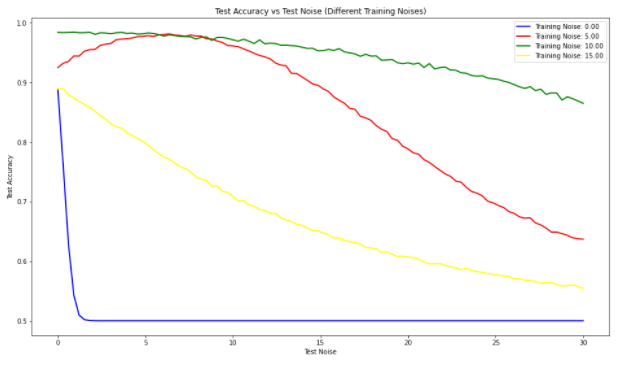

MemoryError: Unable to allocate 763. MiB for an array with shape (10000, 100, 100) and data type float64

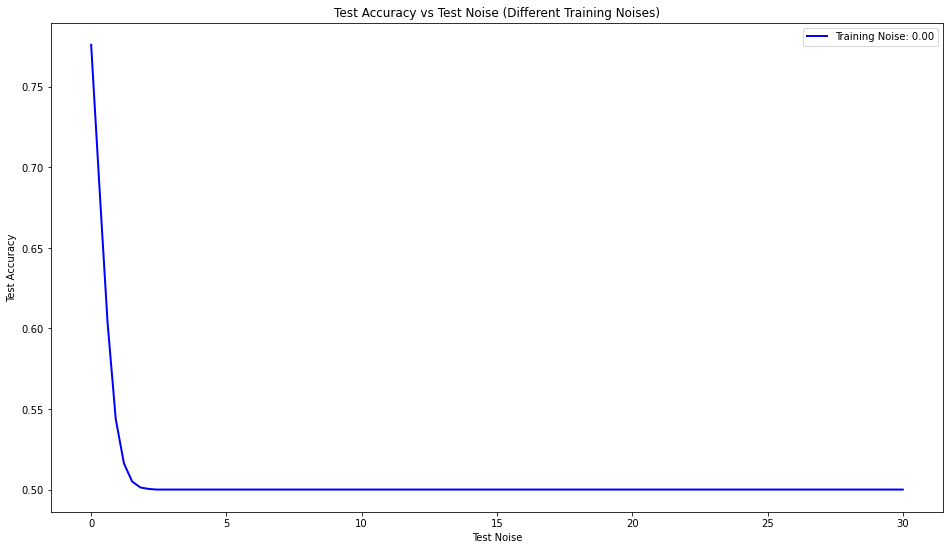

In [39]:
blanks_final = np.zeros_like(images1)
train_images_final = np.concatenate((images1, blanks_final), axis=0)
train_labels_final = np.concatenate((noisy_image_labels, noise_labels), axis=0)
test_images_final = np.concatenate((images2, blanks_final), axis=0)
test_labels_final = np.concatenate((noisy_image_labels, noise_labels),axis=0)
def training_noise(noise):
    '''
    This function does the following: 
    Implement image noise > Compile the model > Fit the model
    The input is the noise level
    '''

  # Create new images with noise and compile the model

    noisy_train = add_noise(train_images_final, noise)
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
  
  # Train model with noisy images
  
    history=model.fit(noisy_train, train_labels_final,batch_size=100, epochs=10, verbose=0) 

    return history

# Evaluate each model

# Take noise values for training from 0-15 in intervals of 5

# Set steps for training noises

train_noise = np.linspace(0,15,4)
fig,ax=plt.subplots(1,1, squeeze=False, figsize=(16,9)) # Create figure for each curves

# Make curves distinguishable

colors = ['blue', 'red', 'green', 'yellow','pink', 'purple', 'orange', 'black','brown', 'lime', 'gray']

# Iterate on different train noise values and their count "i"

# Python enumerate(): Simplify Looping With Countershttps://realpython.com › python-enumerate
# This allows us to iterate on different training noise values and their count "i"

for i, noise in enumerate(train_noise):

    history = training_noise(noise)   # Call function above
    test_noise = np.linspace(0,30,100) # test_noise array
    test_accuracy = []

  # Iterating over test noises

    for j in test_noise:
    
    # Create noisy test images to evaluate

        noisy_test = add_noise(test_images_final, j)
        test_loss, test_acc = model.evaluate(noisy_test, test_labels_final, verbose=0)
        test_accuracy.append(test_acc)
  
  # Compare the different training noise curves 

    ax[0,0].plot(test_noise, test_accuracy, linewidth=2, color= colors[i], label="Training Noise: {:.2f}".format(noise))
    ax[0,0].set_title('Test Accuracy vs Test Noise (Different Training Noises)')
    ax[0,0].set_xlabel("Test Noise")
    ax[0,0].set_ylabel("Test Accuracy")
    ax[0,0].legend()

### (Total image array shuffle method):

In [ ]:
blanks = np.zeros_like(images)

training_images = np.concatenate((images, blanks), axis=0)
training_labels = np.concatenate((image_labels, Enoise_labels), axis=0)

testing_images, testing_labels = unison_shuffled_copies(training_images, training_labels)

def training_noise(noise):
    '''
    This function does the following: 
    Implement image noise > Compile the model > Fit the model
    The input is the noise level
    '''

  # Create new images with noise and compile the model

    noisy_train = add_noise(training_images, noise)
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
  
  # Train model with noisy images
  
    history=model.fit(noisy_train, training_labels,batch_size=100, epochs=10, verbose=0) 

    return history

# Evaluate each model

# Take noise values for training from 0-15 in intervals of 5

# Set steps for training noises

train_noise = np.linspace(0,15,4)
fig,ax=plt.subplots(1,1, squeeze=False, figsize=(16,9)) # Create figure for each curves

# Make curves distinguishable

colors = ['blue', 'red', 'green', 'yellow','pink', 'purple', 'orange', 'black','brown', 'lime', 'gray']

# Iterate on different train noise values and their count "i"

# Python enumerate(): Simplify Looping With Countershttps://realpython.com › python-enumerate
# This allows us to iterate on different training noise values and their count "i"

for i, noise in enumerate(train_noise):

    history = training_noise(noise)   # Call function above
    test_noise = np.linspace(0,30,100) # test_noise array
    test_accuracy = []

  # Iterating over test noises

    for j in test_noise:
    
    # Create noisy test images to evaluate

        noisy_test = add_noise(testing_images, j)
        test_loss, test_acc = model.evaluate(noisy_test, testing_labels, verbose=0)
        test_accuracy.append(test_acc)
  
  # Compare the different training noise curves 

    ax[0,0].plot(test_noise, test_accuracy, linewidth=2, color= colors[i], label="Training Noise: {:.2f}".format(noise))
    ax[0,0].set_title('Test Accuracy vs Test Noise (Different Training Noises)')
    ax[0,0].set_xlabel("Test Noise")
    ax[0,0].set_ylabel("Test Accuracy")
    ax[0,0].legend()